In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [4]:
# Загрузка данных
data = pd.read_csv('train.csv')

# Удаление ненужных столбцов
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Заполнение пропусков в Age медианным значением
data['Age'].fillna(data['Age'].median(), inplace=True)

# Заполнение пропусков в Embarked наиболее частым значением
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# OneHotEncoding категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_features = ['Sex', 'Embarked']
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Объединяем с основными данными и удаляем оригинальные категориальные столбцы
data = pd.concat([data.drop(columns=categorical_features), encoded_df], axis=1)

# Разделение на признаки (X) и целевую переменную (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

C:\Users\shaki\AppData\Local\Temp\ipykernel_26572\2605591721.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\shaki\AppData\Local\Temp\ipykernel_26572\2605591721.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Логистическая регрессия
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Метод опорных векторов (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Дерево решений
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
from sklearn.metrics import accuracy_score, f1_score

# Функция для оценки моделей
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1

# Оценка логистической регрессии
log_reg_accuracy, log_reg_f1 = evaluate_model(log_reg, X_test, y_test)

# Оценка SVM
svm_accuracy, svm_f1 = evaluate_model(svm, X_test, y_test)

# Оценка дерева решений
tree_accuracy, tree_f1 = evaluate_model(tree, X_test, y_test)

# Вывод результатов
print(f"Logistic Regression: Accuracy = {log_reg_accuracy}, F1-score = {log_reg_f1}")
print(f"SVM: Accuracy = {svm_accuracy}, F1-score = {svm_f1}")
print(f"Decision Tree: Accuracy = {tree_accuracy}, F1-score = {tree_f1}")

Logistic Regression: Accuracy = 0.8100558659217877, F1-score = 0.7638888888888888
SVM: Accuracy = 0.6536312849162011, F1-score = 0.3673469387755102
Decision Tree: Accuracy = 0.7821229050279329, F1-score = 0.7417218543046358


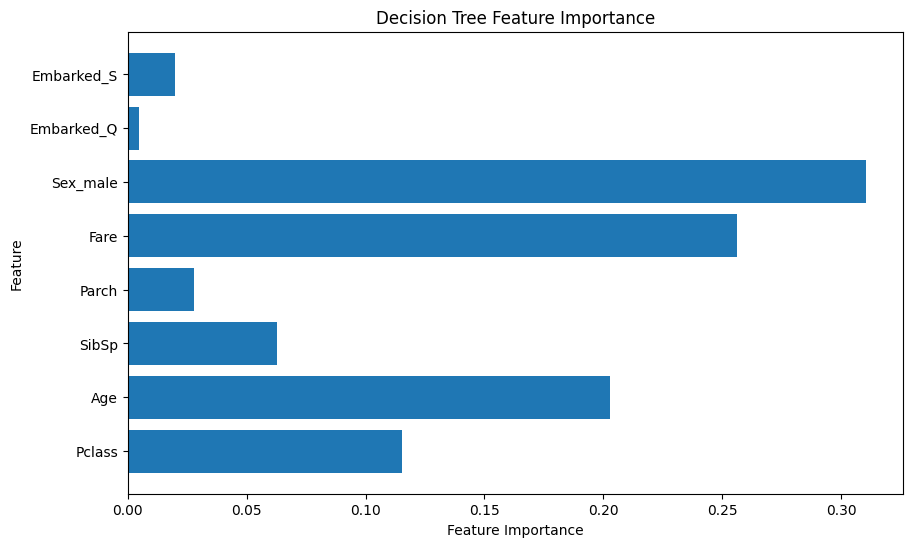

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Важность признаков
feature_importances = tree.feature_importances_
feature_names = X.columns

# Построение графика
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.show()

In [9]:
from sklearn.tree import export_graphviz
import graphviz

# Визуализация дерева
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['Not Survived', 'Survived'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  # Сохранить в файл
graph.view()  # Открыть в отдельном окне

'decision_tree.pdf'

In [10]:
from sklearn.tree import export_text

# Текстовое представление дерева
tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

|--- Sex_male <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- Fare <= 88.78
|   |   |   |   |--- class: 1
|   |   |   |--- Fare >  88.78
|   |   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- Age <= 27.50
|   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |--- Fare <= 13.40
|   |   |   |   |   |   |--- Age <= 22.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  22.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Fare >  13.40
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  24.50
|   |   |   |   |   |--- Pclass <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Pclass >  1.50
|   |   |   |   |   |   |--- Fare <= 17.43
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Fare >  17.43
|   |   |   |   |   |   |   |--- Fare <= 23.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Fare >  23.50
|   |   |   | 